# testing the basics about the 

In [3]:
import numpy as np
from PIL import Image 

In [4]:
image_path = r"C:\Users\luxin\Desktop\Step1Code(1)(3)(1)\image_testing.png"
img = Image.open(image_path)
img1 = np.array(img)
print(img1.shape)

(2048, 2448)


In [8]:
numpy_image = np.array([
              [1,  2,  3,  4,  1,  1,  1,  1,  1,  1,  1], 
              [5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,],
              [6,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,],
              [7,  1,  1,  5,  5,  5,  5,  0,  1,  1,  1,],
              [1,  1,  1,  5,255,255,  5,  0,  1,  1,  1,],
              [1,  1,  1,  5,255,255,  5,  0,  1,  1,  1,],
              [1,  1,  1,  5,  5,  5,  5,  0,  1,  1,  1,],
              [1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,],
              [1,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,],
              [1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,],
              [1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,],    
              ])

In [12]:
print(numpy_image.shape)
print(numpy_image[0, :])
print(numpy_image[:, 0])
print(numpy_image[0][1])
print(numpy_image[1][0])

(11, 11)
[1 2 3 4 1 1 1 1 1 1 1]
[1 5 6 7 1 1 1 1 1 1 1]
2
5


In [ ]:
# 1. using the time.sleep() method
import time, os
def re_exe(inc = 10):
    while True:
        print("yx时间")
        time.sleep(inc)

re_exe(10)

In [5]:
# 2. using the Threading Class// learning the Threading
import threading
def printHello():
    print("运行程序")
    timer = threading.Timer(10, printHello) 
    timer.start()
    print("运行程序2")
#
if __name__ == "__main__":
    timer = threading.Timer(1, printHello)  #10分钟=600秒,表示10分钟后启动一个线程运行本程序


<Timer(Thread-6, initial)>

In [ ]:
# 3. caculate the running time
import time
def func():
    p = 1
    for i in range(1,100000):
        p = p * i
    return p
startTime = time.time()
result = func()
endTime = time.time()
print('The result is %s digit long.'%(len(str(result))))
print('运行时间为%s秒'%(endTime - startTime))
# also use start = time.perf_counter()

In [2]:
from PIL import Image
import numpy as np

def crop_image(image_path, new_width, new_height):
    # 打开图像
    image = Image.open(image_path)
    
    # 将图像转换为数组
    image_array = np.array(image)
    
    # 获取图像的原始宽度和高度
    width, height = image.size
    
    # 计算需要裁剪的区域
    left = (width - new_width) // 2
    top = (height - new_height) // 2
    right = (width + new_width) // 2
    bottom = (height + new_height) // 2
    
    # 裁剪图像
    cropped_image_array = image_array[top:bottom, left:right]
    img = Image.fromarray(cropped_image_array, 'L')
    img.show()
    return cropped_image_array

# 调用函数进行裁剪
image_path = "C:/Users/luxin/Desktop/Dynamic Tracking Ghost Imaging/image_testing.png"  # 修改为您的图像路径
new_width = 1280  
new_height = 800  
cropped_array = crop_image(image_path, new_width, new_height)

# 打印裁剪后的数组
print(cropped_array)


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [1]:
   
import cv2

# threshold define the boundary
def crop_bright_regions(image_path, threshold):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        cropped_image = image[y:y+h, x:x+w]
        cv2.imwrite(f"cropped_{i}.jpg", cropped_image)

# 调用函数进行测试
crop_bright_regions("image_testing.png", 150)

In [7]:
from PIL import Image
import numpy as np
def crop_bright_regious1(image, threshold):
    cropped_images = []
    cropped_images_sum = []
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        cropped_image = image[y:y+h, x:x+w]
        print(cropped_image)
        cropped_images.append(cropped_image)
        sum = np.sum(cropped_image)
        cropped_images_sum.append(sum)
        cv2.imwrite(f"cropped_{i}.jpg", cropped_image)
        # 只存储每次计算得到的最亮的那个散斑对应的图像的大小
    cropped_images.sort(key=lambda x:x.shape[0] * x.shape[1], reverse=True)
    print(cropped_images_sum)

image_path = 'image_testing.png'
image = cv2.imread(image_path)
crop_bright_regious1(image, 100)

[[[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 13  13  13]]

 [[255 255 255]
  [255 255 255]
  [254 254 254]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]

 [[245 245 245]
  [251 251 251]
  [254 254 254]
  ...
  [ 17  17  17]
  [ 17  17  17]
  [ 17  17  17]]

 ...

 [[ 15  15  15]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 23  23  23]
  [ 21  21  21]
  [ 19  19  19]]

 [[ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]
  ...
  [ 22  22  22]
  [ 21  21  21]
  [ 20  20  20]]

 [[ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]
  ...
  [ 21  21  21]
  [ 20  20  20]
  [ 19  19  19]]]
[[[ 9  9  9]
  [13 13 13]
  [12 12 12]
  ...
  [ 8  8  8]
  [ 8  8  8]
  [ 7  7  7]]

 [[ 9  9  9]
  [13 13 13]
  [13 13 13]
  ...
  [ 9  9  9]
  [ 9  9  9]
  [ 8  8  8]]

 [[10 10 10]
  [12 12 12]
  [13 13 13]
  ...
  [10 10 10]
  [10 10 10]
  [ 9  9  9]]

 ...

 [[12 12 12]
  [12 12 12]
  [13 13 13]
  ...
  [21 21 21]
  [20 20 20]
  [19 19 19]]

 [[12 12 12]
  [12 1

In [9]:

from PIL import Image 
import numpy as np

def crop_iamge(image_path, new_width, new_height):
    image = Image.open(image_path)
    image_array = np.array(image)
    width, height = image.size
    left = (width - new_width) // 2
    top = (height -  new_height) // 2
    right = (width + new_width) // 2
    bottom = (height + new_height) // 2
    cropped_image_array = image_array[top:bottom, left:right]
    sum1 = np.sum(cropped_image_array)
    print(sum1)
    noise = np.where(cropped_image_array > 100)
    cropped_image_array[noise] = 0
    sum = np.sum(cropped_image_array)
    print(sum)
    img = Image.fromarray(cropped_image_array, 'L')
    img.show()

image_path = 'image_testing.png'
new_width = 1280
new_height = 800
crop_iamge(image_path, new_width, new_height)

3143648
1476910


In [ ]:
import signal

image_list = []

def acq_mono3(device1, device2, num):
    # 定义一个信号处理函数
    def interrupt_handler(signum, frame):
        print("时间到，中断程序执行")
        raise KeyboardInterrupt

    # 设置中断信号处理函数
    signal.signal(signal.SIGALRM, interrupt_handler)

    # 设置定时器，时间间隔为0.05秒
    signal.setitimer(signal.ITIMER_REAL, 0.05, 0.05)

    try:
        # 在循环中执行图像获取和处理操作
        for i in range(num):
            # 获取图像
            time.sleep(0.05)
            device1.TriggerSoftware.send_command()
            device2.TriggerSoftware.send_command()
            raw_image1 = device1.data_stream[0].get_image()
            raw_image2 = device2.data_stream[0].get_image()

            # 处理图像
            if raw_image1 is None and raw_image2 is None:
                print("获取图像失败")
                continue
            numpy_image1 = raw_image1.get_numpy_array()
            numpy_image2 = raw_image2.get_numpy_array()
            image_list.append(numpy_image2)
            if numpy_image1 is None and numpy_image2 is None:
                continue
            cxy = np.where(numpy_image1 >= 255)
            if len(cxy) != 0:
                cx = np.mean(cxy[1])
                cy = np.mean(cxy[0])
                func3(cx, cy, center)
            else:
                continue
    except KeyboardInterrupt:
        # 处理中断信号
        print("接收到中断信号，停止图像获取和处理")
        pass

    # 关闭定时器
    signal.setitimer(signal.ITIMER_REAL, 0)

    # 返回图像列表
    return image_list


In [ ]:
import threading

def acq_mono3(device1, device2, num):
    # 定义一个线程函数，用于执行图像获取和处理操作
    def image_processing_thread():
        for i in range(num):
            # 获取图像
            time.sleep(0.05)
            device1.TriggerSoftware.send_command()
            device2.TriggerSoftware.send_command()
            raw_image1 = device1.data_stream[0].get_image()
            raw_image2 = device2.data_stream[0].get_image()

            # 处理图像
            if raw_image1 is None and raw_image2 is None:
                print("获取图像失败")
                continue
            numpy_image1 = raw_image1.get_numpy_array()
            numpy_image2 = raw_image2.get_numpy_array()
            image_list.append(numpy_image2)
            if numpy_image1 is None and numpy_image2 is None:
                continue
            cxy = np.where(numpy_image1 >= 255)
            if len(cxy) != 0:
                cx = np.mean(cxy[1])
                cy = np.mean(cxy[0])
                func3(cx, cy, center)
            else:
                continue

    # 创建一个线程对象
    image_thread = threading.Thread(target=image_processing_thread)

    # 启动线程
    image_thread.start()

    # 等待线程完成
    image_thread.join()

    # 返回图像列表
    return image_list


In [ ]:
import threading

def acq_mono3(device1, device2, num):
    # 其他代码...

    # 创建事件对象
    event = threading.Event()

    def worker():
        for i in range(num):
            # 执行循环内的代码
            # ...

            # 设置事件，表示循环内的代码已执行完毕
            event.set()

    # 创建线程
    thread = threading.Thread(target=worker)

    # 启动线程
    thread.start()

    # DMD投影图像代码
    # ...

    # 等待0.05秒
    event.wait(0.05)

    # 等待线程执行完毕
    thread.join()

    # 其他代码...


In [14]:
import numpy as np
from PIL import Image
import os

def transfer_and_save_image(image_list):
    # print(Image_list)
    save_directory = "C:/Users/luxin/Desktop/20230912/data/images"
    os.makedirs(save_directory, exist_ok=True)
    for i in range(len(image_list)):
        img = Image.fromarray(image_list[i], 'L')
        filename = "image_%d.png" % (i + 1)
        img.save(filename, "png")
        img.save(save_directory + filename, "png")

image_list = []
image_path = "C:/Users/luxin/Desktop/20230912/image_testing.png"
image = Image.open(image_path)
image_array = np.array(image)
print(image_array)
image_list.append(image_array)
transfer_and_save_image(image_list)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [8]:
import os

def store_list_to_folder(my_list, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        
    file_path = os.path.join(folder_path, 'list.txt')
    with open(file_path, 'w') as file:
        for item in my_list:
            file.write(str(item) + '\n')
            
my_list = [1, 2, 3, 4, 5]
folder_path = 'C:/Users/luxin/Desktop/20230912/data/intensity/'
store_list_to_folder(my_list, folder_path)

测试读取散斑的顺序正确性以及镜像翻转数组的正确性：

In [5]:
import cv2
import os
from natsort import natsorted, ns
import numpy as np
from PIL import Image

size = 500
ref_path = "C:/Users/luxin/Desktop/050"

os.chdir(ref_path)

filelist = [f for f in os.listdir(ref_path) if f.endswith('.png')]
filelist = natsorted(filelist)

img_data = []
for i in range(size):
    img = cv2.imread(filelist[i], cv2.IMREAD_GRAYSCALE)
    img_data.append(img)
img_data = np.asarray(img_data)

flipped_image = []
for i in range(size):
    img_data[i] = np.flip(img_data[i], axis=1)
    flipped_image.append(img_data[i])
print(len(flipped_image))    

arr = []
for k in range(size):
    image = img_data[k].flatten()
    arr.append(image)
arr = np.asarray(arr)

print(filelist)
print(arr.shape)
print(img_data.shape)
print(flipped_image[100])
imag_reverse = Image.fromarray(flipped_image[100], 'L')
imag_reverse.show()
# 问题出现在存储的顺序和文件夹中的索引差一个数字，natsorted里面是从0开始编码

500
['1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png', '43.png', '44.png', '45.png', '46.png', '47.png', '48.png', '49.png', '50.png', '51.png', '52.png', '53.png', '54.png', '55.png', '56.png', '57.png', '58.png', '59.png', '60.png', '61.png', '62.png', '63.png', '64.png', '65.png', '66.png', '67.png', '68.png', '69.png', '70.png', '71.png', '72.png', '73.png', '74.png', '75.png', '76.png', '77.png', '78.png', '79.png', '80.png', '81.png', '82.png', '83.png', '84.png', '85.png', '86.png', '87.png', '88.png', '89.png', '90.png', '91.png', '92.png', '93.png', '94.png', '95.png', '96.png', '97.png', '98.png', '99.png', '100.png', '10

In [17]:
import numpy as np
a = np.zeros((800,1280))
print(a.shape)
print(a.shape[0])

(800, 1280)
800


测试反转二维数组的代码：

In [1]:
import numpy as np

# 创建一个示例numpy数组
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# 对数组进行水平方向的镜像对称
arr_horizontal = np.flip(arr, axis=1)

# 对数组进行垂直方向的镜像对称
arr_vertical = np.flip(arr, axis=0)

print("原始数组：")
print(arr)
print("\n水平方向镜像对称后的数组:")
print(arr_horizontal)
print("\n垂直方向镜像对称后的数组:")
print(arr_vertical)

原始数组：
[[1 2 3]
 [4 5 6]
 [7 8 9]]

水平方向镜像对称后的数组:
[[3 2 1]
 [6 5 4]
 [9 8 7]]

垂直方向镜像对称后的数组:
[[7 8 9]
 [4 5 6]
 [1 2 3]]


In [1]:
# testing the threading.Timer() workflow

import threading

def my_function():
    print("Timer executed.")

# 创建一个计时器，延迟2秒后执行 my_function 函数，然后以0.5秒的间隔重复执行
timer = threading.Timer(2, my_function)
timer.start()
timer.join()

Timer executed.


threading.Timer在设定的时间之后会执行一次目标函数，并在设定的时间间隔内重复执行

In [4]:
import threading
import time

def func(num):
    print('hello {} timer!'.format(num))

# 如果t时候启动的函数是含有参数的，直接在后面传入参数元组
timer = threading.Timer(5, func,(10,))
time0 = time.time()
timer.start()
print(time.time()-time0)

0.0009982585906982422


hello 10 timer!


In [ ]:
import threading
import time

def my_function():
    # 在这里执行线程内的操作
    print("Running a task...")
    # 等待0.05秒
    time.sleep(0.05)

    # 创建一个计时器，0.05秒后再次执行 my_function 函数
    timer = threading.Timer(0.05, my_function)
    timer.start()

# 创建一个线程，目标函数为 my_function
thread3 = threading.Thread(target=my_function)

# 启动线程
thread3.start()

1. 使用定时器的一个例子

In [3]:
import time
from threading import Thread,Timer 

def my_function():
    # Create a timer that triggers every 0.05 seconds
    t = Timer(interval=0.05, function=lambda: print("Timer triggered!"))
    t.start()
    
    # Do some work here...
    for i in range(10):
        print(f"Doing some work {i}")
        time.sleep(0.2)
        
    # Stop the timer when we're done with our work
    t.cancel()

# Start the thread
thread3 = Thread(target=my_function)
thread3.start()

Doing some work 0


Timer triggered!
Doing some work 1
Doing some work 2
Doing some work 3
Doing some work 4
Doing some work 5
Doing some work 6
Doing some work 7
Doing some work 8
Doing some work 9


2. 使用定时器的另外一个例子

In [8]:
import time
import datetime
import threading 


# 定义总共输出几次的计数器
count = 0
def print_time():
    print("当前时间：%s" % time.ctime())
    global t, count
    count += 1
    # 如果count小于10，开始下一次调度
    if count < 10:
        t = Timer(1, print_time)
        t.start()
# 指定1秒后执行print_time函数
now = datetime.datetime.now()
print(now)
t = threading.Timer(1, print_time)
t.start()

# 这个应该是停一秒后执行target函数，然后在里面再去判断，是否需要继续下一步的重构函数

2023-09-20 17:13:25.471670


当前时间：Wed Sep 20 17:13:26 2023
当前时间：Wed Sep 20 17:13:27 2023
当前时间：Wed Sep 20 17:13:28 2023
当前时间：Wed Sep 20 17:13:29 2023
当前时间：Wed Sep 20 17:13:30 2023
当前时间：Wed Sep 20 17:13:31 2023
当前时间：Wed Sep 20 17:13:32 2023
当前时间：Wed Sep 20 17:13:33 2023
当前时间：Wed Sep 20 17:13:34 2023
当前时间：Wed Sep 20 17:13:35 2023


In [9]:
from threading import Timer
import time
import datetime


# 定义总共输出几次的计数器
count = 0
def print_time():
    print("当前时间：%s" % time.ctime())
    global t, count
    count += 1
    # 如果count小于10，开始下一次调度
    if count < 10:
        t = Timer(1, print_time)
        t.start()
# 指定1秒后执行print_time函数
now = datetime.datetime.now()
print(now)
t = Timer(1, print_time)
t.start()
# 这个应该是停一秒后执行target函数，然后在里面再去判断，是否需要继续下一步的重构函数

2023-09-20 17:14:23.317675


当前时间：Wed Sep 20 17:14:24 2023
当前时间：Wed Sep 20 17:14:25 2023
当前时间：Wed Sep 20 17:14:26 2023
当前时间：Wed Sep 20 17:14:27 2023
当前时间：Wed Sep 20 17:14:28 2023
当前时间：Wed Sep 20 17:14:29 2023
当前时间：Wed Sep 20 17:14:30 2023
当前时间：Wed Sep 20 17:14:31 2023
当前时间：Wed Sep 20 17:14:32 2023
当前时间：Wed Sep 20 17:14:33 2023


1. 创建自己的Thread类实现对其中类的操作，是一种更为常见的方式

In [ ]:
MAX_TIME = 1

import threading
class MyThread(threading.Thread):
    def __init__(self, name):
        super().__init__()
        self.name = name
    def run(self):
        try:
            print("hello world")
        except Exception as e:
            print(e)
my_thread = MyThread("My Thread")
my_thread.start()
time.sleep(MAX_TIME)
my_thread.join()
print("Terminated thread")

In [ ]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
 
import threading
import time
 
class myThread (threading.Thread):
    def __init__(self, threadID, name, counter):
        threading.Thread.__init__(self)
        self.threadID = threadID
        self.name = name
        self.counter = counter
    def run(self):
        print ("Starting " + self.name)
       # 获得锁，成功获得锁定后返回True
       # 可选的timeout参数不填时将一直阻塞直到获得锁定
       # 否则超时后将返回False
        threadLock.acquire()
        print_time(self.name, self.counter, 3)
        # 释放锁
        threadLock.release()
 
def print_time(threadName, delay, counter):
    while counter:
        time.sleep(delay)
        print ("%s: %s" % (threadName, time.ctime(time.time())))
        counter -= 1
 
threadLock = threading.Lock()
threads = []
 
# 创建新线程
thread1 = myThread(1, "Thread-1", 1)
thread2 = myThread(2, "Thread-2", 2)
 
# 开启新线程
thread1.start()
thread2.start()
 
# 添加线程到线程列表
threads.append(thread1)
threads.append(thread2)
 
# 等待所有线程完成
for t in threads:
    t.join()
print ("Exiting Main Thread")

In [ ]:
from PIL import Image
 
img = Image.open('test_1.png')
resized_image = img.resize((64, 64))
thresh = resized_image.convert('L')
thresh.show()

In [4]:
import time
start_time = time.perf_counter()
print("start time: %s" % start_time)
for i in range(10):
    print ("I'm working hard! %s" % i)
end_time = time.perf_counter()
print("end time: %s" % end_time)
elapsed_time = end_time - start_time
print("process_time()用时：{}s".format(elapsed_time))

start time: 273.1357358
I'm working hard! 0
I'm working hard! 1
I'm working hard! 2
I'm working hard! 3
I'm working hard! 4
I'm working hard! 5
I'm working hard! 6
I'm working hard! 7
I'm working hard! 8
I'm working hard! 9
end time: 273.1359364
process_time()用时：0.0002005999999710184s


In [3]:
import time

print('我是time()方法：{}'.format(time.time()))
print('我是perf_counter()方法：{}'.format(time.perf_counter()))
print('我是process_time()方法：{}'.format(time.process_time()))
t0 = time.time()
c0 = time.perf_counter()
p0 = time.process_time()
r = 0
for i in range(10000000):
    r += i
time.sleep(2)
print(r)
t1 = time.time()
c1 = time.perf_counter()
p1 = time.process_time()
spend1 = t1 - t0
spend2 = c1 - c0
spend3 = p1 - p0
print("time()方法用时：{}s".format(spend1))
print("perf_counter()用时：{}s".format(spend2))
print("process_time()用时：{}s".format(spend3))
print("测试完毕")


我是time()方法：1704787837.551693
我是perf_counter()方法：214.4931412
我是process_time()方法：1.46875
49999995000000
time()方法用时：2.8421709537506104s
perf_counter()用时：2.8423590999999817s
process_time()用时：0.84375s
测试完毕


In [2]:
import numpy as np
dim1, dim2, dim3 = 10, 1280, 800
matrix_3d_random = np.random.rand(dim1, dim2, dim3)
print(len(matrix_3d_random))
print(len(matrix_3d_random[0]))
print(matrix_3d_random.shape)

np.save("./2024-ConbinedCode/data/capture/matrix_3d_save.npy", matrix_3d_random)
data = np.load("./2024-ConbinedCode/data/capture/matrix_3d_save.npy")
print(data.shape)
print(data)

10
1280
(10, 1280, 800)
(10, 1280, 800)
[[[0.72142741 0.67868962 0.84836905 ... 0.71152708 0.16222606 0.9055844 ]
  [0.83233021 0.29483975 0.44617098 ... 0.93004601 0.29910327 0.50312826]
  [0.2193536  0.53511572 0.25497246 ... 0.15810124 0.72487143 0.70364689]
  ...
  [0.01862191 0.55663982 0.09351075 ... 0.947156   0.32510532 0.02997884]
  [0.29528865 0.83443912 0.73997816 ... 0.88471291 0.66639087 0.84788697]
  [0.48455906 0.14101656 0.68360093 ... 0.46629439 0.57485225 0.20285294]]

 [[0.35042952 0.66982509 0.18550079 ... 0.97665456 0.74071254 0.55376807]
  [0.0305586  0.84410779 0.30831215 ... 0.6480463  0.473112   0.97641473]
  [0.85238442 0.65317762 0.65341272 ... 0.91026545 0.87839986 0.55125307]
  ...
  [0.4500054  0.92308558 0.71169356 ... 0.74546139 0.71571757 0.45741284]
  [0.49373545 0.8176425  0.00157121 ... 0.88748691 0.54452767 0.23850896]
  [0.15854666 0.32958736 0.71696959 ... 0.21703953 0.5533993  0.14215073]]

 [[0.22076942 0.5591012  0.09698158 ... 0.74333395 0.258

In [7]:

import os 
import numpy as np
file_path = "./2024-ConbinedCode/datainfo"
if os.path.exists(file_path):
    os.makedirs(file_path)
    file_path = os.path.join(file_path, 'cropped_numpy_image_list_test.npy')
    np.save(file_path, matrix_3d_random.shape)
else:
    print("The file does not exist")


The file does not exist


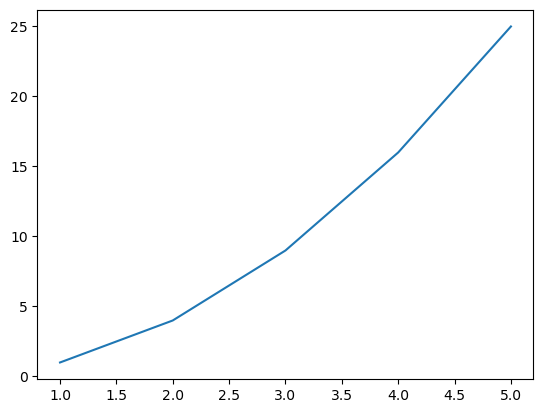

In [4]:
import matplotlib.pyplot as plt
import os

# 创建一些数据和图形
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.show()

folder_path = "../pictures/ghost_final/"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    file_path = os.path.join(folder_path, 'ghost_final.png')
    plt.savefig(file_path)

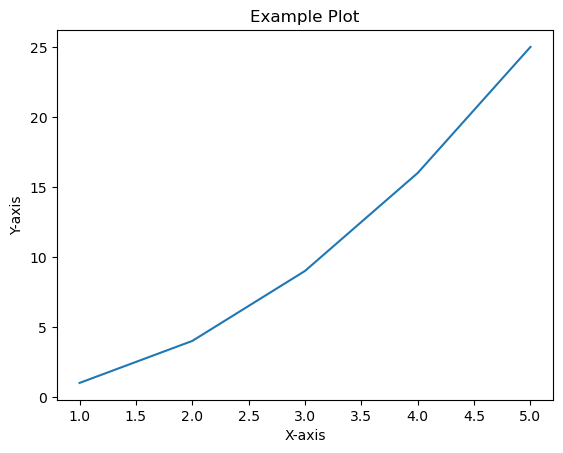

In [12]:
import matplotlib.pyplot as plt

# 创建一些数据和图形
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# 绘制线图
plt.plot(x, y)

# 设置图形标题和坐标轴标签
plt.title('Example Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 将图形保存到指定路径的文件中
file_path = '1.png'
plt.savefig(file_path)  # dpi参数用于设置图像分辨率

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个简单的灰度图像数组
image_data = np.random.rand(100, 100)

# 将图像保存为PNG格式文件
plt.imsave('./pictures/ghost_final/random_image.png', image_data)
